# Loan Status Analysis

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error

### Objective

Your objective is to build a classification model that can accurately predict the loan status of future applicants based on their attributes. The model should be trained on historical data to learn patterns and relationships between the features and the loan status. Once trained, the model should be capable of making predictions on new, unseen data.

### Import Training Data

In [2]:
df=pd.read_csv('Downloads/loan_status_project/credit/credit_train.csv')

In [3]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Overview of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### Null Value Treatment

In [6]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [7]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [8]:
df.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

### Adding new feature soo the model performance would increase

In [9]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [10]:
df['Loan Status']

0         Fully Paid
1         Fully Paid
2         Fully Paid
3         Fully Paid
4         Fully Paid
             ...    
100509    Fully Paid
100510    Fully Paid
100511    Fully Paid
100512    Fully Paid
100513    Fully Paid
Name: Loan Status, Length: 100514, dtype: object

In [11]:
df['Loan to Income Ratio']=df['Current Loan Amount'] / df['Annual Income']
df['Loan to Income Ratio']

0          0.381511
1          0.190330
2         44.805035
3          0.430840
4          0.127855
            ...    
100509     8.532720
100510     8.532720
100511     8.532720
100512     8.532720
100513     8.532720
Name: Loan to Income Ratio, Length: 100514, dtype: float64

### EDA (exploratory data analysis )

Loan Status vs Current Loan Amount


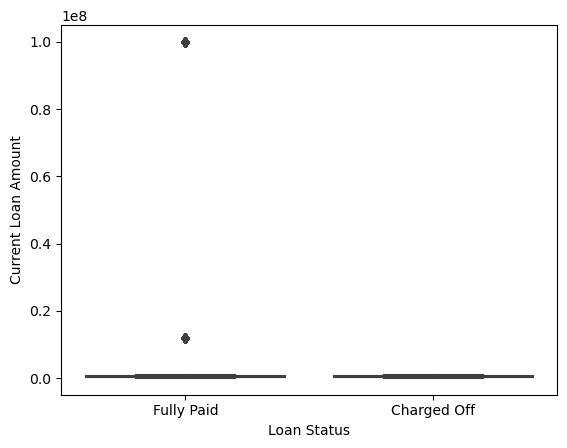

Loan Status vs Credit Score


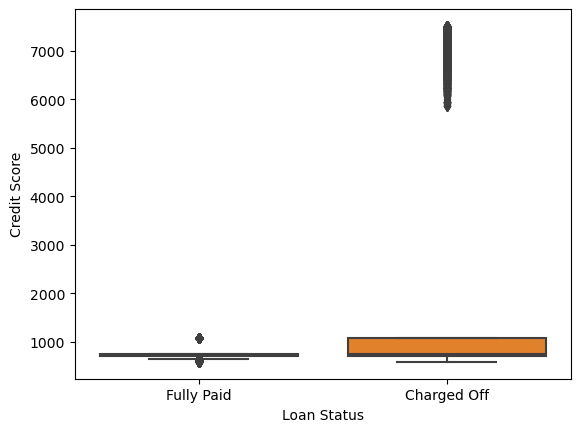

Loan Status vs Annual Income


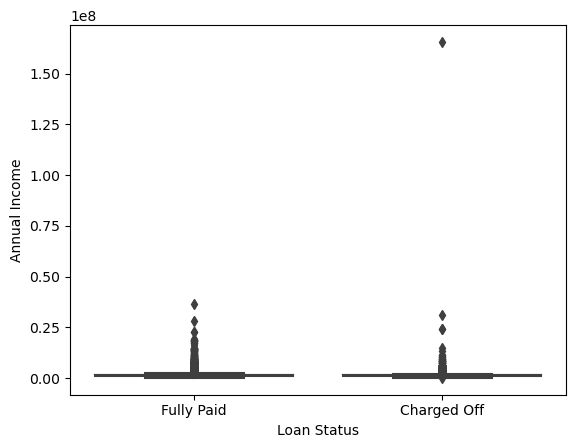

Loan Status vs Monthly Debt


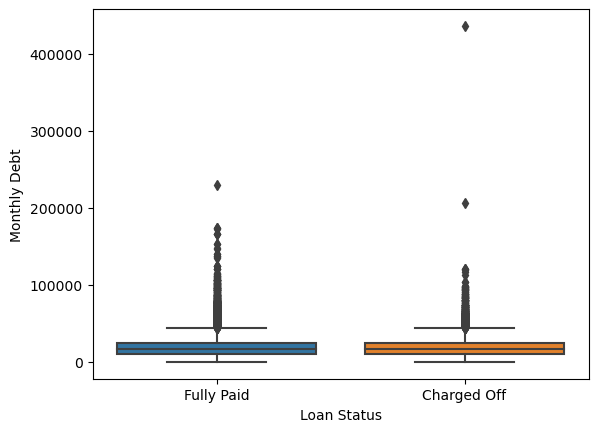

Loan Status vs Years of Credit History


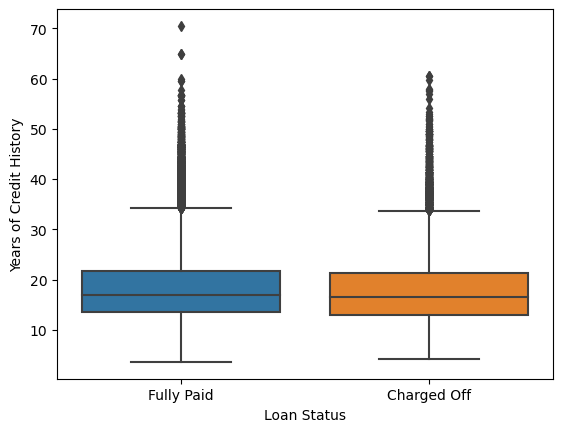

Loan Status vs Months since last delinquent


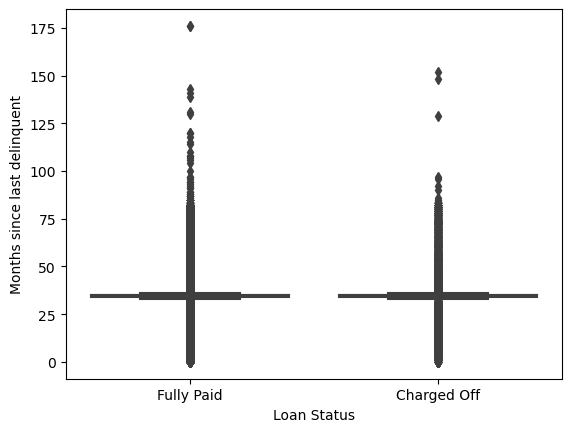

Loan Status vs Number of Open Accounts


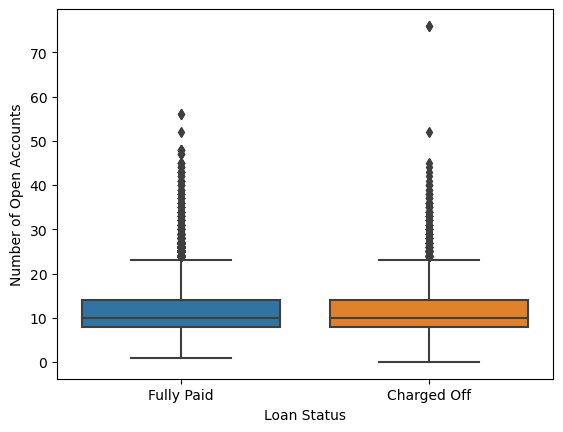

Loan Status vs Number of Credit Problems


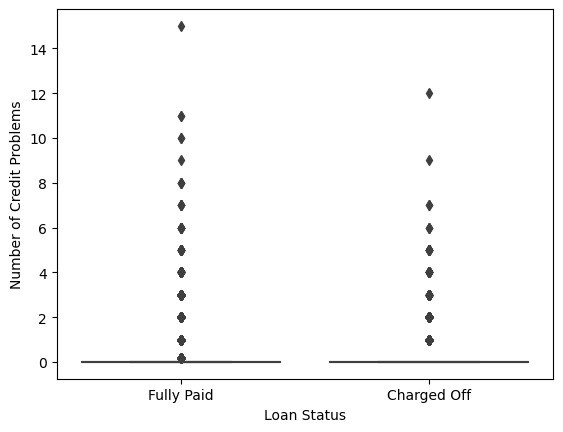

Loan Status vs Current Credit Balance


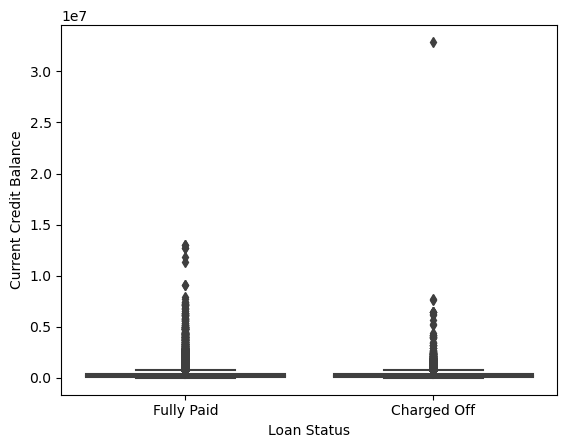

Loan Status vs Maximum Open Credit


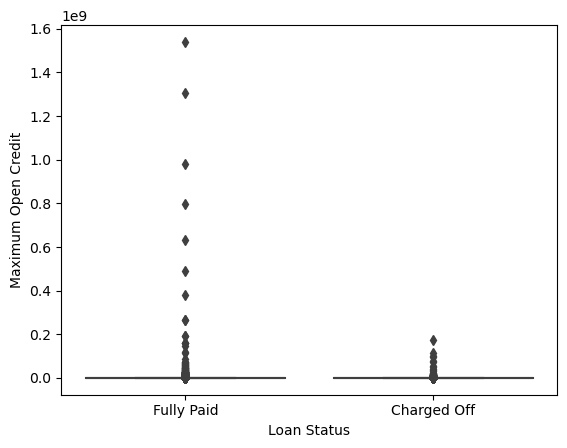

Loan Status vs Bankruptcies


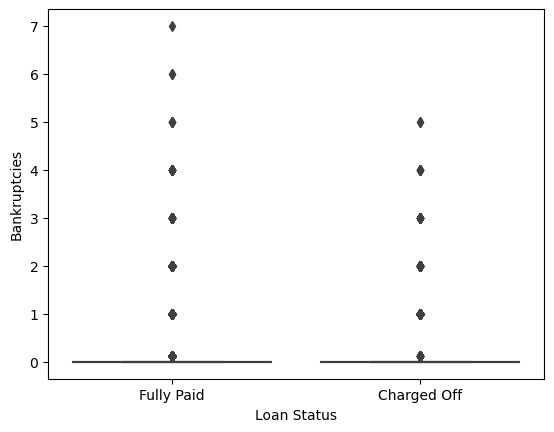

Loan Status vs Tax Liens


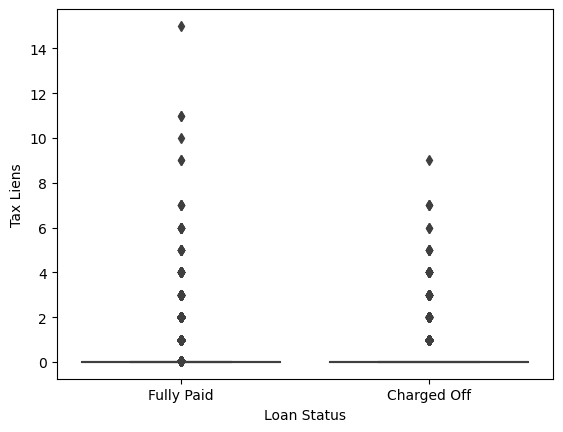

Loan Status vs Loan to Income Ratio


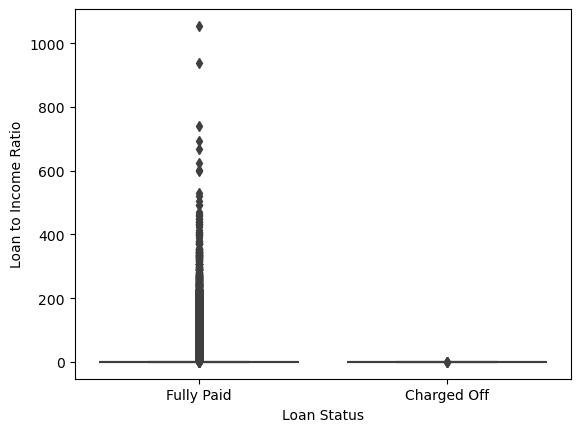

In [12]:
from matplotlib.pyplot import show

for i in df.columns:
    if df[i].dtypes==float:
        sns.boxplot(data=df,x='Loan Status',y=i)
        print('Loan Status vs',i)
        show()

In [13]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,4.454120e+05,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.740000,17.200000,34.901321,6.00000,1.00000,228190.00000,416746.000000,1.00000,0.000000,0.381511
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,2.623280e+05,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.980000,21.100000,8.000000,35.00000,0.00000,229976.00000,850784.000000,0.00000,0.000000,0.190330
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,1.000000e+08,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.530000,14.900000,29.000000,18.00000,1.00000,297996.00000,750090.000000,0.00000,0.000000,44.805035
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,3.476660e+05,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.900000,12.000000,34.901321,9.00000,0.00000,256329.00000,386958.000000,0.00000,0.000000,0.430840
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,1.762200e+05,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.700000,6.100000,34.901321,15.00000,0.00000,253460.00000,427174.000000,0.00000,0.000000,0.127855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,1.176045e+07,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313,8.532720
100510,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,1.176045e+07,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313,8.532720
100511,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,1.176045e+07,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313,8.532720
100512,00069ff1-a877-4d35-81be-7cd359b99956,000877d4-55ed-4126-abda-968f61da7b7f,Fully Paid,1.176045e+07,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,18472.412336,18.199141,34.901321,11.12853,0.16831,294637.38235,760798.381748,0.11774,0.029313,8.532720


### Separating input and output features


In [14]:
x=df.drop(labels='Loan Status',axis=1)
y=df[['Loan Status']]

In [15]:
x.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Loan to Income Ratio'],
      dtype='object')

In [16]:
y.columns

Index(['Loan Status'], dtype='object')

In [17]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [18]:
print('Cat:',cat)
print('Con:',con)

Cat: ['Loan ID', 'Customer ID', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
Con: ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan to Income Ratio']


### Outliers Treatment

In [19]:
se=StandardScaler()

In [20]:
Xcon=pd.DataFrame(se.fit_transform(x[con]),columns=con)

In [21]:
Xcon

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,-0.356914,-0.277703,-0.217347,-1.091727e+00,-1.427889e-01,-4.730770e-16,-1.026318,1.727409e+00,-0.177096,-0.041140,2.519557,-1.138334e-01,-0.303197
1,-0.362689,0.000000,0.000000,1.220673e+00,4.145666e-01,-1.791081e+00,4.777142,-3.495776e-01,-0.172336,0.010760,-0.336242,-1.138334e-01,-0.308667
2,2.783370,-0.253520,0.880194,8.834262e-01,-4.714858e-01,-3.929080e-01,1.375114,1.727409e+00,0.008951,-0.001280,-0.336242,-1.138334e-01,0.967851
3,-0.359997,-0.268634,-0.589117,-8.012766e-01,-8.859297e-01,-4.730770e-16,-0.425960,-3.495776e-01,-0.102100,-0.044702,-0.336242,-1.138334e-01,-0.301786
4,-0.365405,0.000000,0.000000,1.784692e-01,-1.729109e+00,-4.730770e-16,0.774756,-3.495776e-01,-0.109746,-0.039893,-0.336242,-1.138334e-01,-0.310455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,-0.069974
100510,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,-0.069974
100511,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,-0.069974
100512,0.000000,0.000000,0.000000,2.995759e-16,5.077243e-16,-4.730770e-16,0.000000,-5.764796e-17,0.000000,0.000000,0.000000,1.347320e-17,-0.069974


In [22]:
out=[]
for i in Xcon.columns:
    ol=Xcon[(Xcon[i]>3)| (Xcon[i]<-3)].index
    out.extend(ol)
    
print(out)

[5, 43, 51, 56, 65, 97, 117, 160, 165, 200, 216, 221, 276, 303, 307, 365, 383, 385, 389, 406, 410, 449, 509, 535, 558, 602, 609, 663, 673, 679, 693, 695, 732, 749, 776, 786, 788, 792, 802, 814, 824, 825, 842, 892, 902, 930, 996, 1051, 1094, 1127, 1146, 1165, 1180, 1187, 1189, 1298, 1373, 1375, 1410, 1422, 1428, 1496, 1507, 1515, 1525, 1538, 1548, 1554, 1619, 1621, 1637, 1643, 1656, 1658, 1666, 1682, 1692, 1708, 1723, 1728, 1744, 1754, 1807, 1870, 1874, 1886, 1900, 1905, 1916, 1930, 1935, 1944, 1950, 1965, 2004, 2046, 2064, 2065, 2070, 2095, 2103, 2150, 2161, 2177, 2183, 2192, 2197, 2236, 2241, 2270, 2277, 2292, 2303, 2341, 2363, 2428, 2434, 2478, 2486, 2517, 2523, 2555, 2559, 2573, 2600, 2624, 2646, 2659, 2664, 2674, 2679, 2688, 2697, 2711, 2732, 2751, 2757, 2773, 2792, 2835, 2847, 2849, 2885, 2903, 2920, 2931, 3008, 3022, 3061, 3066, 3103, 3125, 3151, 3200, 3205, 3213, 3223, 3230, 3233, 3283, 3287, 3303, 3306, 3315, 3354, 3400, 3430, 3442, 3454, 3508, 3524, 3533, 3567, 3637, 3681, 370

In [23]:
outliers=list(set(out))
print(outliers)

[32768, 1, 32770, 98306, 5, 98311, 32776, 10, 98315, 65547, 12, 65552, 65553, 32787, 98325, 32791, 24, 29, 65566, 32801, 65570, 98337, 32804, 98341, 98342, 36, 32802, 32809, 65577, 43, 98347, 98343, 46, 98352, 65584, 51, 98355, 98356, 54, 65591, 56, 65593, 32819, 32820, 32829, 63, 65, 65603, 98371, 32838, 98374, 65610, 74, 76, 65612, 65614, 77, 65618, 98388, 32853, 87, 98393, 32858, 65625, 98396, 32860, 96, 97, 32866, 32867, 103, 32871, 65644, 98413, 98414, 32879, 65648, 98416, 32882, 117, 65654, 118, 32888, 65663, 65664, 130, 32900, 65669, 98439, 65673, 32906, 32905, 98442, 65677, 65679, 32912, 98451, 98452, 32917, 151, 32919, 32920, 157, 98462, 32927, 160, 161, 32928, 32929, 98465, 165, 98470, 169, 32945, 98482, 179, 32948, 180, 98486, 98491, 98496, 32961, 200, 65742, 98511, 65747, 216, 32984, 65753, 98522, 65756, 221, 32989, 32994, 98533, 32998, 229, 33000, 233, 98538, 65771, 33004, 238, 241, 65778, 33009, 98548, 65781, 248, 65785, 33018, 33020, 98558, 98559, 257, 98562, 98564, 3303

In [24]:
X=x.drop(index=outliers,axis=0)
Y=y.drop(index=outliers,axis=0)

In [25]:
X.shape

(85346, 19)

In [26]:
Y.shape

(85346, 1)

In [27]:
X.index=range(0,85346)
Y.index=range(0,85346)

In [28]:
Xcat=X[cat]
Xcon=X[con]

In [29]:
Xcat.columns

Index(['Loan ID', 'Customer ID', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')

In [30]:
Xcon.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan to Income Ratio'],
      dtype='object')

### Preprocessing

In [31]:
Xcon=pd.DataFrame(se.fit_transform(Xcon),columns=Xcon.columns)

In [32]:
le=LabelEncoder()

In [33]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26220\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26220\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26220\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [34]:
Xcat


,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose
0,5622,41249,1,8,1,5
1,21539,25823,1,8,2,3
2,32469,62730,0,3,2,3
3,57588,35077,1,5,3,3
4,10669,39157,1,10,1,3
...,...,...,...,...,...,...
85341,7,7,1,1,1,3
85342,7,7,1,1,1,3
85343,7,7,1,1,1,3
85344,7,7,1,1,1,3


In [35]:
Xcon

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,-0.313881,-0.563848,-0.288591,-1.226750,-0.091572,0.027292,-1.071134,2.767147,-0.175557,-0.294874,2.947743,-0.078522,-0.297326
1,3.160199,-0.349819,1.608841,1.133320,-0.452618,-0.383799,1.568592,2.767147,0.149598,0.243969,-0.342286,-0.078522,1.732746
2,-0.317292,-0.483587,-0.931309,-0.879697,-0.907850,0.027292,-0.411203,-0.364371,-0.044486,-0.343026,-0.342286,-0.078522,-0.295071
3,-0.323275,1.893850,0.087159,0.290981,-1.834012,0.027292,0.908660,-0.364371,-0.057850,-0.278017,-0.342286,-0.078522,-0.308917
4,-0.321829,-0.423391,-0.258819,-0.671772,0.285171,-1.707355,0.468706,2.767147,-0.669397,-0.528769,2.947743,-0.078522,-0.306361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85341,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169
85342,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169
85343,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169
85344,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169


### Joining the Data

In [36]:
X=Xcat.join(Xcon)

In [37]:
X

,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,5622,41249,1,8,1,5,-0.313881,-0.563848,-0.288591,-1.226750,-0.091572,0.027292,-1.071134,2.767147,-0.175557,-0.294874,2.947743,-0.078522,-0.297326
1,21539,25823,1,8,2,3,3.160199,-0.349819,1.608841,1.133320,-0.452618,-0.383799,1.568592,2.767147,0.149598,0.243969,-0.342286,-0.078522,1.732746
2,32469,62730,0,3,2,3,-0.317292,-0.483587,-0.931309,-0.879697,-0.907850,0.027292,-0.411203,-0.364371,-0.044486,-0.343026,-0.342286,-0.078522,-0.295071
3,57588,35077,1,5,3,3,-0.323275,1.893850,0.087159,0.290981,-1.834012,0.027292,0.908660,-0.364371,-0.057850,-0.278017,-0.342286,-0.078522,-0.308917
4,10669,39157,1,10,1,3,-0.321829,-0.423391,-0.258819,-0.671772,0.285171,-1.707355,0.468706,2.767147,-0.669397,-0.528769,2.947743,-0.078522,-0.306361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85341,7,7,1,1,1,3,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169
85342,7,7,1,1,1,3,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169
85343,7,7,1,1,1,3,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169
85344,7,7,1,1,1,3,0.080971,1.893850,0.087159,0.077732,0.065269,0.027292,0.057025,0.162695,0.133954,0.261279,0.045082,12.735206,0.075169


In [38]:
Y

,Loan Status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Fully Paid
...,...
85341,Fully Paid
85342,Fully Paid
85343,Fully Paid
85344,Fully Paid


### Before spliting Data Encoding the dependent column

In [39]:
Y['Loan Status']=le.fit_transform(Y['Loan Status'])

In [40]:
Y

,Loan Status
0,1
1,1
2,1
3,1
4,1
...,...
85341,1
85342,1
85343,1
85344,1


### Spliting Data for Training and Testing

In [41]:
 Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

### Feature Engineering

In [42]:
from statsmodels.api import add_constant,OLS

In [43]:
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan Status   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:01:09   Log-Likelihood:                -31788.
No. Observations:               68276   AIC:                         6.362e+04
Df Residuals:                   68256   BIC:                         6.380e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7743      0.006    125.067      0.000       0.762       0.786
Loan ID                       1.961e-07   7.38e-08      2.656      0.008    5.14e-08    3.41e-07
Customer ID                   2.534e-08   7.39e-08      0.343      0.732    -1.2e-07     1.7e-07
Term                             0.1056      0.003     30.993      0.000       0.099       0.112
Years in current job            -0.0002      0.000     -0.369      0.712      -0.001       0.001
Home Ownership                  -0.0215      0.002    -13.184      0.000      -0.025      -0.018
Purpose                         -0.0031      0.001     -4.779      0.000      -0.004      -0.002
Current Loan Amount              0.0222      0.005      4.355      0.000       0.012       0.032
Credit Score                    -0.0393      0.002    -25.868      0.000      -0.042      -0.036
Annual Income                    0.0361      0.002     20.059      0.000       0.033       0.040
Monthly Debt                    -0.0142      0.002     -7.119      0.000      -0.018      -0.010
Years of Credit History          0.0031      0.002      1.946      0.052   -2.21e-05       0.006
Months since last delinquent     0.0037      0.001      2.493      0.013       0.001       0.007
Number of Open Accounts         -0.0061      0.002     -3.632      0.000      -0.009      -0.003
Number of Credit Problems       -0.0049      0.004     -1.147      0.252      -0.013       0.003
Current Credit Balance          -0.0123      0.002     -5.812      0.000      -0.016      -0.008
Maximum Open Credit              0.0194      0.002     10.389      0.000       0.016       0.023
Bankruptcies                     0.0047      0.004      1.105      0.269      -0.004       0.013
Tax Liens                        0.0169      0.001     11.319      0.000       0.014       0.020
Loan to Income Ratio             0.0295      0.005      5.830      0.000       0.020       0.039
==============================================================================
Omnibus:                    12920.233   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21992.522
Skew:                          -1.386   Prob(JB):                         0.00
Kurtosis:                       3.205   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model.pvalues.sort_values()

const                            0.000000e+00
Term                            1.891709e-209
Credit Score                    7.818630e-147
Annual Income                    3.030948e-89
Home Ownership                   1.210065e-39
Tax Liens                        1.129216e-29
Maximum Open Credit              2.909023e-25
Monthly Debt                     1.101536e-12
Loan to Income Ratio             5.563387e-09
Current Credit Balance           6.217148e-09
Purpose                          1.769489e-06
Current Loan Amount              1.334383e-05
Number of Open Accounts          2.810883e-04
Loan ID                          7.906248e-03
Months since last delinquent     1.266472e-02
Years of Credit History          5.166387e-02
Number of Credit Problems        2.515566e-01
Bankruptcies                     2.689978e-01
Years in current job             7.123691e-01
Customer ID                      7.317071e-01
dtype: float64

In [45]:
b=model.pvalues.sort_values().index[-1]

In [46]:
b

'Customer ID'

In [47]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Years in current job
0.055


In [48]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Bankruptcies
0.055


In [49]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Number of Credit Problems
0.055


In [50]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Years of Credit History
0.055


In [51]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Months since last delinquent
0.055


In [52]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Loan ID
0.055


In [53]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Number of Open Accounts
0.055


In [54]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Current Loan Amount
0.055


In [55]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Purpose
0.055


In [56]:
b=model.pvalues.sort_values().index[-1]
X=X.drop(labels=b,axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(Ytrain,add_constant(Xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
b=model.pvalues.sort_values().index[-1]
print(b)
print(score)

Current Credit Balance
0.054


In [57]:
X.columns #the final columns

Index(['Term', 'Home Ownership', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit',
       'Tax Liens', 'Loan to Income Ratio'],
      dtype='object')

In [58]:
X.shape

(85346, 9)

### Final model Building

In [59]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

### Random Forest Algorithm

In [60]:
model=RandomForestClassifier(n_estimators=10,random_state=46)

In [61]:
model.fit(Xtrain,Ytrain)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=10, random_state=46)

In [62]:
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

In [63]:
tr_score= accuracy_score(tr_pred,Ytrain)
ts_score= accuracy_score(ts_pred,Ytest)

tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)

print('tr_score',tr_score)
print('ts_score',ts_score)

print('tr_error',tr_error)
print('ts_error',ts_error)

tr_score 0.9916808248872224
ts_score 0.7787932044522554
tr_error 0.00831917511277755
ts_error 0.22120679554774458


In [64]:
tr_com=confusion_matrix(Ytrain,tr_pred)
ts_com=confusion_matrix(Ytest,ts_pred)

print('tr_com',tr_com)
print()
print('ts_com',ts_com)

tr_com [[12902   446]
 [  122 54806]]

ts_com [[  582  2684]
 [ 1092 12712]]


### SVM (Super Vector Machine)

In [65]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=69)

In [66]:
sv=SVC()

In [67]:
model=sv.fit(Xtrain,Ytrain)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

In [69]:
tr_pred

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
ts_pred

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

print('tr_score',tr_score)
print('ts_score',ts_score)

tr_score 0.8063008963618256
ts_score 0.8014645577035735


In [72]:
sv=SVC(kernel='linear')
model=sv.fit(Xtrain,Ytrain)
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

print('tr_pred',tr_pred)
print('ts_pred',ts_pred)

tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

print('tr_score',tr_score)
print('ts_score',ts_score)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tr_pred [1 1 1 ... 1 1 1]
ts_pred [1 1 1 ... 1 1 1]
tr_score 0.8063008963618256
ts_score 0.8014645577035735


In [73]:
tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)
print('tr_error',tr_error)
print('ts_error',ts_error)

tr_error 0.19369910363817447
ts_error 0.19853544229642647


In [74]:
tr_com=confusion_matrix(Ytrain,tr_pred)
ts_com=confusion_matrix(Ytest,ts_pred)

print('tr_com',tr_com)
print()
print('ts_com',ts_com)

tr_com [[    0 13225]
 [    0 55051]]

ts_com [[    0  3389]
 [    0 13681]]


### KNN Nearest Neighbor

In [75]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [76]:
knr=KNeighborsClassifier(n_neighbors=9)
model=knr.fit(Xtrain,Ytrain)
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

print('tr_score',tr_score)
print('ts_score',ts_score)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


tr_score 0.8167145116878551
ts_score 0.7918570591681312


In [77]:
tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)

In [78]:
print(tr_error)
print(ts_error)

0.18328548831214483
0.20814294083186877


In [79]:
tr_com=confusion_matrix(Ytrain,tr_pred)
ts_com=confusion_matrix(Ytest,ts_pred)

print('tr_com',tr_com)
print()
print('ts_com',ts_com)

tr_com [[ 2077 11271]
 [ 1243 53685]]

ts_com [[  272  2994]
 [  559 13245]]


### Decision Tree

In [80]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [81]:
dtr=DecisionTreeClassifier(random_state=21,criterion='gini')
model=dtr.fit(Xtrain,Ytrain)

In [82]:
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)

print('tr_score',tr_score)
print('ts_score',ts_score)
print()
print('tr_error',tr_error)
print('tr_error',ts_error)

tr_score 1.0
ts_score 0.7341534856473345

tr_error 0.0
tr_error 0.2658465143526655


In [83]:
dtr=DecisionTreeClassifier(max_depth=2)
model=AdaBoostClassifier(dtr,n_estimators=100)

In [84]:
model=dtr.fit(Xtrain,Ytrain)
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)

print('tr_score',tr_score)
print('ts_score',ts_score)
print()
print('tr_error',tr_error)
print('ts_error',ts_error)

tr_score 0.8044993848497276
ts_score 0.8086701816051552

tr_error 0.19550061515027242
ts_error 0.19132981839484475


In [85]:
tunning_parameters={'n_estimators':np.arange(1,40),'random_state':[21,32,43,54]}

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
gscv=GridSearchCV(AdaBoostClassifier(),cv=4,param_grid=tunning_parameters)

In [88]:
cvmodel=gscv.fit(X,Y)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [89]:
   cvmodel.best_params_

{'n_estimators': 34, 'random_state': 21}

In [90]:
model=AdaBoostClassifier(dtr,n_estimators=34)
model.fit(Xtrain,Ytrain)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=34)

In [91]:
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)

print('tr_score',tr_score)
print('ts_score',ts_score)
print()
print('tr_error',tr_error)
print('ts_error',ts_error)

tr_score 0.8046897885054778
ts_score 0.8085530169888694

tr_error 0.19531021149452224
ts_error 0.19144698301113064


In [92]:
tr_com=confusion_matrix(Ytrain,tr_pred)
ts_com=confusion_matrix(Ytest,ts_pred)

print('tr_com',tr_com)
print()
print('ts_com',ts_com)

tr_com [[  218 13130]
 [  205 54723]]

ts_com [[   59  3207]
 [   61 13743]]


### GreadSearch on KNN to fit acuracy

In [93]:
tunning_parameters={'n_neighbors':np.arange(2,40)}

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
knnc=KNeighborsClassifier()
gscv=GridSearchCV(knnc,param_grid=tunning_parameters,cv=5,scoring='accuracy')
gscv.fit(X,Y)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])},
             scoring='accuracy')

In [96]:
gscv.best_params_

{'n_neighbors': 37}

In [97]:
knr=KNeighborsClassifier(n_neighbors=37)
model=knr.fit(Xtrain,Ytrain)
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [98]:
tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)

tr_com=confusion_matrix(Ytrain,tr_pred)
ts_com=confusion_matrix(Ytest,ts_pred)

print("tr_score",tr_score)
print("ts_score",ts_score)
print()

print("tr_error",tr_error)
print("ts_error",ts_error)
print()

print("tr_com",tr_com)
print()
print("ts_com",ts_com)

tr_score 0.8060958462710176
ts_score 0.8067955477445812

tr_error 0.19390415372898237
ts_error 0.19320445225541885

tr_com [[  551 12797]
 [  442 54486]]

ts_com [[  103  3163]
 [  135 13669]]


### GridSearch on Random Forest

In [99]:
tunning_parameters={'n_estimators':np.arange(1,40),'random_state':[21,32,43,54]}

In [100]:
RN=RandomForestClassifier()
gscv=GridSearchCV(RN,param_grid=tunning_parameters)
gscv.fit(X,Y)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'random_state': [21, 32, 43, 54]})

In [101]:
gscv.best_params_

{'n_estimators': 39, 'random_state': 32}

In [102]:
model=RandomForestClassifier(n_estimators=39,random_state=32)
model.fit(Xtrain,Ytrain)
tr_pred=model.predict(Xtrain)
ts_pred=model.predict(Xtest)

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [105]:
tr_score=accuracy_score(tr_pred,Ytrain)
ts_score=accuracy_score(ts_pred,Ytest)

tr_error=mean_absolute_error(tr_pred,Ytrain)
ts_error=mean_absolute_error(ts_pred,Ytest)

tr_com=confusion_matrix(Ytrain,tr_pred)
ts_com=confusion_matrix(Ytest,ts_pred)

print('tr_score',tr_score)
print('ts_score',ts_score)
print()
print('tr_error',tr_error)
print('ts_error',ts_error)
print()
print('tr_com',tr_com)
print()
print('ts_com',ts_com)


tr_score 0.9994580819028649
ts_score 0.8037492677211482

tr_error 0.0005419180971351573
ts_error 0.19625073227885179

tr_com [[13312    36]
 [    1 54927]]

ts_com [[  271  2995]
 [  355 13449]]


###### As the requiredment the random forset are the only one whose working and giveing good accuracy then any other algorithm as it works good in traning datasets but bad in testing

In [107]:
X.columns

Index(['Term', 'Home Ownership', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit',
       'Tax Liens', 'Loan to Income Ratio'],
      dtype='object')

### Importing Testing Data

In [187]:
df2=pd.read_csv('Downloads/loan_status_project/credit/credit_test.csv')

In [214]:
df2['Loan to Income Ratio']=df2['Current Loan Amount'] / df['Annual Income']
df2['Loan to Income Ratio']

0        0.294735
1        0.138945
2        0.176205
3        0.225927
4        0.182831
           ...   
10348         NaN
10349         NaN
10350         NaN
10351         NaN
10352         NaN
Name: Loan to Income Ratio, Length: 10353, dtype: float64

In [215]:
df2

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,6.113140e+05,Short Term,747.00000,2.074116e+06,10+ years,Home Mortgage,Debt Consolidation,42000.830000,21.80000,34.964636,9.0000,0.0000,621908.0000,1.058970e+06,0.000000,0.000000,0.294735
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,2.666620e+05,Short Term,734.00000,1.919190e+06,10+ years,Home Mortgage,Debt Consolidation,36624.400000,19.40000,34.964636,11.0000,0.0000,679573.0000,9.044420e+05,0.000000,0.000000,0.138945
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,1.534940e+05,Short Term,709.00000,8.711120e+05,2 years,Rent,Debt Consolidation,8391.730000,12.50000,10.000000,10.0000,0.0000,38532.0000,3.880360e+05,0.000000,0.000000,0.176205
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,1.762420e+05,Short Term,727.00000,7.800830e+05,10+ years,Rent,Debt Consolidation,16771.870000,16.50000,27.000000,16.0000,1.0000,156940.0000,5.313220e+05,1.000000,0.000000,0.225927
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,3.219920e+05,Short Term,744.00000,1.761148e+06,10+ years,Home Mortgage,Debt Consolidation,39478.770000,26.00000,44.000000,14.0000,0.0000,359765.0000,4.680720e+05,0.000000,0.000000,0.182831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,0004f37b-5859-40f6-98d0-367aa3b3f3f1,00010876-7972-40c5-8238-e1f187ca1396,1.160380e+07,Short Term,1077.99152,1.369106e+06,10+ years,Home Mortgage,Debt Consolidation,18429.671699,18.23593,34.964636,11.0841,0.1655,290730.0637,6.871308e+05,0.116356,0.030803,NaN
10349,0004f37b-5859-40f6-98d0-367aa3b3f3f1,00010876-7972-40c5-8238-e1f187ca1396,1.160380e+07,Short Term,1077.99152,1.369106e+06,10+ years,Home Mortgage,Debt Consolidation,18429.671699,18.23593,34.964636,11.0841,0.1655,290730.0637,6.871308e+05,0.116356,0.030803,NaN
10350,0004f37b-5859-40f6-98d0-367aa3b3f3f1,00010876-7972-40c5-8238-e1f187ca1396,1.160380e+07,Short Term,1077.99152,1.369106e+06,10+ years,Home Mortgage,Debt Consolidation,18429.671699,18.23593,34.964636,11.0841,0.1655,290730.0637,6.871308e+05,0.116356,0.030803,NaN
10351,0004f37b-5859-40f6-98d0-367aa3b3f3f1,00010876-7972-40c5-8238-e1f187ca1396,1.160380e+07,Short Term,1077.99152,1.369106e+06,10+ years,Home Mortgage,Debt Consolidation,18429.671699,18.23593,34.964636,11.0841,0.1655,290730.0637,6.871308e+05,0.116356,0.030803,NaN


### Overview of Data

In [216]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10353 non-null  object 
 1   Customer ID                   10353 non-null  object 
 2   Current Loan Amount           10353 non-null  float64
 3   Term                          10353 non-null  object 
 4   Credit Score                  10353 non-null  float64
 5   Annual Income                 10353 non-null  float64
 6   Years in current job          10353 non-null  object 
 7   Home Ownership                10353 non-null  object 
 8   Purpose                       10353 non-null  object 
 9   Monthly Debt                  10353 non-null  float64
 10  Years of Credit History       10353 non-null  float64
 11  Months since last delinquent  10353 non-null  float64
 12  Number of Open Accounts       10353 non-null  float64
 13  N

In [217]:
df2.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,34.964636,9.0,0.0,621908.0,1058970.0,0.0,0.0,0.294735
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,34.964636,11.0,0.0,679573.0,904442.0,0.0,0.0,0.138945
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.000000,10.0,0.0,38532.0,388036.0,0.0,0.0,0.176205
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.000000,16.0,1.0,156940.0,531322.0,1.0,0.0,0.225927
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.000000,14.0,0.0,359765.0,468072.0,0.0,0.0,0.182831


### Null Value Treatment

In [218]:
df2.isna().sum()

Loan ID                            0
Customer ID                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Annual Income                      0
Years in current job               0
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       0
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                       0
Tax Liens                          0
Loan to Income Ratio            2334
dtype: int64

In [219]:
for i in df2.columns:
    if df2[i].dtypes==object:
        df2[i]=df[i].fillna(df2[i].mode()[0])
    else:
        df2[i]=df2[i].fillna(df2[i].mean())

In [220]:
df2.isna().sum()

Loan ID                         0
Customer ID                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Loan to Income Ratio            0
dtype: int64

### Preprocessing

In [221]:
cat=[]
con=[]
for i in df2.columns:
    if df2[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [222]:
print('cat',cat)
print()
print('con',con)

cat ['Loan ID', 'Customer ID', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

con ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan to Income Ratio']


In [223]:
Xcaat=df2[cat]
Xcon=df2[con]

In [224]:
Xcon=pd.DataFrame(se.fit_transform(Xcon),columns=Xcon.columns)

In [225]:
Xcon

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,-3.539667e-01,-0.254565,0.922142,1.934263,0.516732,0.000000,-0.422160,-3.361804e-01,0.868152,2.032692e-01,-0.338690,-1.087562e-01,-3.959218e-01
1,-3.650647e-01,-0.264563,0.719501,1.493070,0.168771,0.000000,-0.017035,-3.361804e-01,1.019315,1.187951e-01,-0.338690,-1.087562e-01,-4.005785e-01
2,-3.687088e-01,-0.283791,-0.651368,-0.823719,-0.831617,-1.713444,-0.219598,-3.361804e-01,-0.661114,-1.635028e-01,-0.338690,-1.087562e-01,-3.994648e-01
3,-3.679763e-01,-0.269947,-0.770433,-0.136040,-0.251682,-0.546652,0.995776,1.695121e+00,-0.350718,-8.517426e-02,2.572117,-1.087562e-01,-3.979785e-01
4,-3.632831e-01,-0.256872,0.512785,1.727302,1.125664,0.620141,0.590652,-3.361804e-01,0.180969,-1.197504e-01,-0.338690,-1.087562e-01,-3.992667e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17
10349,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17
10350,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17
10351,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17


In [226]:
le=LabelEncoder()

In [227]:
for i in Xcaat.columns:
    Xcaat[i]=le.fit_transform(Xcaat[i])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26220\3548814527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcaat[i]=le.fit_transform(Xcaat[i])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26220\3548814527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcaat[i]=le.fit_transform(Xcaat[i])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26220\3548814527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [228]:
Xcaat

,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose
0,9680,8714,1,1,1,3
1,4325,886,1,1,1,3
2,9689,1725,1,2,3,3
3,5137,737,1,1,3,3
4,333,2221,1,1,1,3
...,...,...,...,...,...,...
10348,0,0,1,1,1,3
10349,0,0,1,1,1,3
10350,0,0,1,1,1,3
10351,0,0,1,1,1,3


### Joining the Dataset

In [229]:
Xn=Xcaat.join(Xcon)

In [230]:
Xn

,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan to Income Ratio
0,9680,8714,1,1,1,3,-3.539667e-01,-0.254565,0.922142,1.934263,0.516732,0.000000,-0.422160,-3.361804e-01,0.868152,2.032692e-01,-0.338690,-1.087562e-01,-3.959218e-01
1,4325,886,1,1,1,3,-3.650647e-01,-0.264563,0.719501,1.493070,0.168771,0.000000,-0.017035,-3.361804e-01,1.019315,1.187951e-01,-0.338690,-1.087562e-01,-4.005785e-01
2,9689,1725,1,2,3,3,-3.687088e-01,-0.283791,-0.651368,-0.823719,-0.831617,-1.713444,-0.219598,-3.361804e-01,-0.661114,-1.635028e-01,-0.338690,-1.087562e-01,-3.994648e-01
3,5137,737,1,1,3,3,-3.679763e-01,-0.269947,-0.770433,-0.136040,-0.251682,-0.546652,0.995776,1.695121e+00,-0.350718,-8.517426e-02,2.572117,-1.087562e-01,-3.979785e-01
4,333,2221,1,1,1,3,-3.632831e-01,-0.256872,0.512785,1.727302,1.125664,0.620141,0.590652,-3.361804e-01,0.180969,-1.197504e-01,-0.338690,-1.087562e-01,-3.992667e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,0,0,1,1,1,3,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17
10349,0,0,1,1,1,3,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17
10350,0,0,1,1,1,3,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17
10351,0,0,1,1,1,3,5.997863e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.637994e-17,0.000000,6.363947e-17,0.000000,-1.224955e-17,5.309782e-17


In [231]:
j=X.columns #Columns for training data

In [232]:
z=Xn.columns #Columns fot testing data

In [233]:
s=[]
for i in z:
    if i not in j:
        s.append(i)

In [234]:
s

['Loan ID',
 'Customer ID',
 'Years in current job',
 'Purpose',
 'Current Loan Amount',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Bankruptcies']

In [235]:
Xn=Xn.drop(labels=s,axis=1) #Droping all the columns that are not in from testing

In [236]:
Xn.columns

Index(['Term', 'Home Ownership', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit',
       'Tax Liens', 'Loan to Income Ratio'],
      dtype='object')

In [237]:
X.columns

Index(['Term', 'Home Ownership', 'Credit Score', 'Annual Income',
       'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit',
       'Tax Liens', 'Loan to Income Ratio'],
      dtype='object')

### Final Prediction

In [239]:
new_preds=model.predict(Xn)

In [240]:
new_preds

array([1, 1, 1, ..., 1, 1, 1])

In [241]:
model.predict([[1,2,4,5.5,4.6,48,56,11.2,11.3]])

C:\Users\ADMIN\anaconda2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])